# Redes Neuronales Convolucionales

Una red neuronal convolucional CNN es una de las ANN más comunes y usadas actualmente. Este tipo de red es una variación de un MLP, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión por computador, especificamente en tareas de clasificación y segmentación de imágenes.

![](https://miro.medium.com/max/1200/1*3DUs-90altOgaBcVJ9LTGg.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] (8, 8)


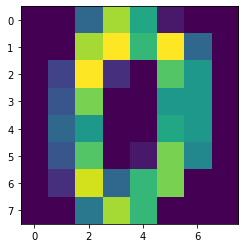

In [4]:
# Visualizar datos
print(digits['images'][0], np.shape(digits['images'][0]))
plt.imshow(digits['images'][0])

In [5]:
X = digits['images']
Y = digits['target']

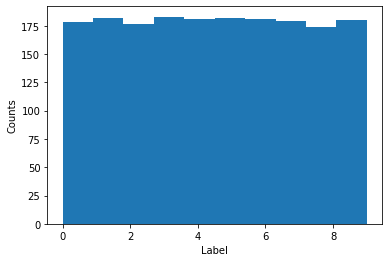

In [6]:
# Visualizar los datos
_ = plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('Label')
plt.show()

In [7]:
# Separar los datos entre entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

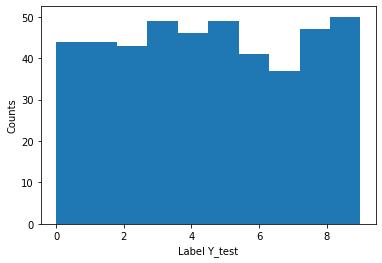

In [8]:
# Visualizar los datos
_ = plt.hist(Y_test)
plt.ylabel('Counts')
plt.xlabel('Label Y_test')
plt.show()

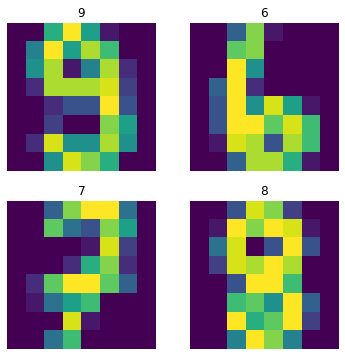

In [9]:
#-- Visualizamos los datos
fig = plt.figure(figsize=(6,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[i*15])
    plt.title(Y_test[i*15])
    plt.axis(False)
plt.show()

# Capas de una CNN


#Capas Convolucionales

A diferencia de las capas densamente conectadas (**Linear**) las redes convolucionales se componen principalmente de capas de convolución que reciben como parámetro de entrada el número de canales que componen el mapa bidimensional (en el caso de la primera capa convolucional es la imagen original). Para imágenes en escala de gris, en numero de canales es 1. En el caso de imágenes a color se podría tratar de 3 (RGB) o 4 (RGBA) canales. La salida de una capa convolucional son un número de canales seleccionado. Cada canal tiene un mapa de características asociado y se obtiene al aplicar un kernel (filtro) sobre el mapa de entrada.

## Kernel 
**Ejemplo**: 

* *Input (x)*: 3x3
* *Kernel (w)*: 2x2
* *Output (z)*: 2x2

El kernel hace una convolución por toda la imagen, de izquierda a derecha y de arriba a abajo, de modo que la salida es un mapa de características bidimensional donde en valor de cada entrada del mapa corresponde al producto $w*x$. Así por ejemplo, 0x0+ 1x1 + 2x3 + 4x3 = 19.

![](https://classic.d2l.ai/_images/correlation.svg)

Los kernel son definidos aleatoriamente por Pytorch, sin embargo, es posible pasarle un filtro específico para efectuar la convolución.

## Padding

De acuerdo al ejemplo de la imagen anterior al realizar la convolución, el tamaño del mapa de salida es menor que el tamaño del de entrada. Para evitar esta perdida de información en los bordes se puede utilizar el parametro *padding*. Este parámetro agrega información en los bordes, de modo que al pasar el kernel sobre todo el mapa, se recupera el tamaño inicial. El contenido de estos bordes extra depende del parámetro *padding_mode*, que toma por defecto el valor 'zeros'. En la imagen de ejemplo se aplica un padding igual a 1 y se utilizan ceros como valores por defecto. Más infromación [aquí](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).

![](https://classic.d2l.ai/_images/conv-pad.svg)


## Stride

Otro parámetro importante en la capa convolucional es el espacio entre cada aplicación del kernel, el kernel por defecto y luego de ejecutado, salta hacia la derecha un paso. Cuando termina horizontalmente, hace un salto vertical arrancando nuevamente desde la izquierda, así hasta barrer toda la imagen. 
El valor de estos saltos horizontales y verticales se puede definir usando el parámetro *stride*. En la imagen de ejemplo se aplica un stride de la forma (2,3), dando como resultado una salida de tamaño 2x2. 

![](https://classic.d2l.ai/_images/conv-stride.svg)


# Max Pooling y Global Average Pooling

La idea detrás de la técnica *Pooling* es perder resolución en la imagen para obtener las características más representativas de la imagen. El *max pooling* consiste en tomar el valor máximo de un kernel de *pooling* proyectándolo en el mapa de salida. Una variedad de este método consiste en tomar el promedio global del kernel y no el máximo. El uso de técnicas de *pooling* se sustenta también en la disminución del número de características en la red.

![](https://classic.d2l.ai/_images/pooling.svg)

# Calculo del número de características 

Para calcular el tamaño de los mapas de características y el número total de característica de la red se usa la siguiente ecuación.

$$\large{ \frac{W - F + 2P}{S} + 1 }$$

Donde $W$ es el tamaño del ancho del mapa de características, $F$ el tamaño del kernel, $P$ el valor de padding y $S$ el valor del stride. De esta forma y utilizando la ecuación anterior en cada capa se puede controlar el tamaño de características en cada capa.

_(Imágenes tomadas de: Dive into Deep Learning - Aston Zhang, Zachary C. Lipton, Mu Li, and Alexander J. Smola)_

# Dropout

Durante el entrenamiento es posible convertir algunos pesos en nulos, de modo que la red no aprenda las mismas conexiones en cada entrenamiento, si no que trate de encontrar diferentes caminos dentro de la red y así garantizar un aprendizaje más general.

Esta es una técnica de regularización que previene la adaptación de las neuronas.


![](https://www.researchgate.net/publication/336754568/figure/fig3/AS:817383757328385@1571890882529/The-difference-between-standard-NN-and-Dropout-NN-53-Dropout-method-randomly-drops.ppm)

In [10]:
import torch

In [11]:
np.shape(X_train)

(1347, 8, 8)

In [12]:
#--- Definimos la CNN

model = torch.nn.Sequential(
  torch.nn.Conv2d(1, 16, kernel_size=2, stride=1, padding=2),
  # ( (8-2+2*2)/1 ) + 1 = 11   -> 11*11*16

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  # 11/2 = 5                 -> 5*5*16

  torch.nn.Dropout(p=0.2),

  torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=2),
  # ( (5-3+2*2)/1 ) + 1 = 7   -> 7*7*32

  torch.nn.ReLU(),

  torch.nn.MaxPool2d(kernel_size=2),
  # 7/2 = 3                 -> 3*3*32

  torch.nn.Dropout(p=0.2), 

  torch.nn.Flatten(),
  torch.nn.Linear(3*3*32, 10)
)
model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.2, inplace=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.2, inplace=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=288, out_features=10, bias=True)
)

In [13]:
#-- Después de activar el entorno GPU se selecciona el dispositivo

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [14]:
#--- Definimos los criterios de evaluación y el optmizador

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=0.1)

In [15]:
# !pip install hiddenlayer

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:1672: UserWarning: Dropout is a training op and should not be exported in inference mode. For inference, make sure to call eval() on the model and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


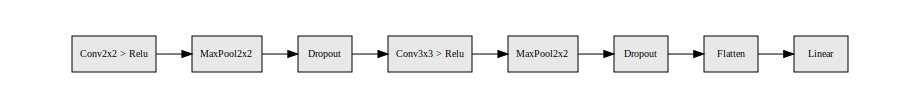

In [16]:
#--- Visualizamos la estructura de nuestra CNN

import hiddenlayer as hl

hl.build_graph(model, torch.zeros([16,1,8,8]))

In [17]:
batch_size = 32

train_ds = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(Y_train))
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

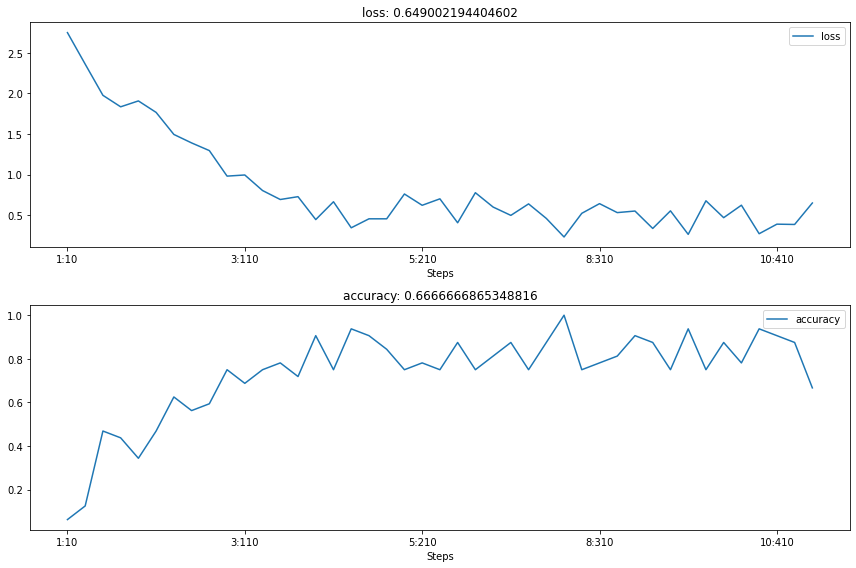

In [18]:
#--- Entrenamos la CNN

from sklearn.metrics import f1_score

n_epoch = 10

history = hl.History()
canvas = hl.Canvas()

model.to(device)


iter = 0

for epoch in range(n_epoch):
  for batch_id, (X_train_batch, Y_train_batch) in enumerate(train_dl):

    #-- Cargamos los datos en la GPU
    X_train_batch, Y_train_batch = X_train_batch.to(device), Y_train_batch.to(device)

    model.train()
    Xtr = X_train_batch.unsqueeze(1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train_batch)

    Y_pred = torch.argmax(Y_pred, 1)

    #-- Calculamos el f1 en la cpu
    f1 = f1_score(Y_train_batch.cpu(),Y_pred.cpu(), average='macro')

    acc = sum(Y_train_batch == Y_pred)/len(Y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    iter += 1

    if iter%10 == 0:
        history.log((epoch+1, iter), loss=loss, accuracy=acc)
        with canvas:
          canvas.draw_plot(history["loss"])
          canvas.draw_plot(history["accuracy"])

In [19]:
#-- Validamos el modelo

X_test_tensor, Y_test_tensor = torch.from_numpy(X_test).float().to(device), torch.from_numpy(Y_test).to(device)
model.eval()
Y_pred = model(X_test_tensor.unsqueeze(1))

loss = criterion(Y_pred,Y_test_tensor)
Y_pred = torch.argmax(Y_pred, 1)

f1 = f1_score(Y_test_tensor.cpu(), Y_pred.cpu(), average='macro')

acc = sum(Y_test_tensor == Y_pred)/len(Y_pred)

print( 'Loss:{:.2f}, F1:{:.2f}, Acc:{:.2f}'.format(loss.item(), f1, acc ) )

Loss:0.28, F1:0.95, Acc:0.95


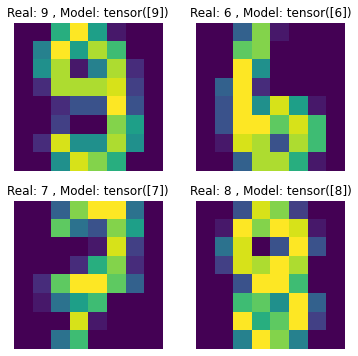

In [20]:
#-- Visualizamos los datos
fig = plt.figure(figsize=(6,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[i*15])
    plt.title(f'Real: {Y_test[i*15]} , Model: { torch.argmax( model( torch.from_numpy( X_test[i*15] ).float().unsqueeze(0).unsqueeze(0).to(device) ), 1)   }')
    plt.axis(False)
plt.show()